In [1]:
print("""CONTEXT: The consumption of wine these days is becoming more common in social gatherings and to monitor the health
of individuals it's very important to maintain the quality of the wine. For the assessment of wine quality many methods
have been proposed. I have taken wine dataset comprising Red and White wines samples. 

The question that I am trying to answer is to build a classifier to correctly classify the wine on a scale of 1 to 10 
(1 - lowest quality and 10 - highest quality) basis the Physical characteristics and the Chemical composition of the wine, 
leveraging different supervised machine learning classification algorithms. 

- This is a multi-class classification problem.
      
OBJECTIVE: 
1. Classsify the Wine Samples of White and Red wine on a scale of 1 to 10 and achieving a accuracy of over ~ 65%
2. Recall of over 70% for class 5 and class 6
3. Identify the features that influence the quality of wine the most

DATA SOURCE: https://www.kaggle.com/datasets/mihaltursukov/wine-quality/dataLinks to an external site.

Data Source: Kaggle
1. 6497 wine data points
2. 11 features/physical characteristics: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
3. Output variable: “Quality” (1 through 10)

Following are the Supervised Machine Learning algorithms that will be used to categorize the Wine quality and select the best 
basis the accuracy, Recall and interpretability:

1. Logistics Regression 2. KNN 3. Decision Trees 4. Support Vector Machines 5. Random Forest 6. Gradient Boosting (XGBoost) 7. Neural Networks
      
SUCCESS METRICS:
1. Accuracy score of Wine classification: Accuracy > 65%, Recall, Precision > 65%
2. Highest Recall for Class 5 and 6 (over 70% for class 5 and class 6)
3. Optimizing the F1 Score (Precision-Recall Tradeoff)
4. Clear communication of the features that influence the Quality of Wine the most

The steps include Data Cleaning, Exploratory Data Analysis (EDA), Feature Engineering, Model Building and Hyperparameter Tuning,
Model Testing and Selection, Summary of Key Findings
      
FIRST STEP : DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA)""")


CONTEXT: The consumption of wine these days is becoming more common in social gatherings and to monitor the health
of individuals it's very important to maintain the quality of the wine. For the assessment of wine quality many methods
have been proposed. I have taken wine dataset comprising Red and White wines samples. 

The question that I am trying to answer is to build a classifier to correctly classify the wine on a scale of 1 to 10 
(1 - lowest quality and 10 - highest quality) basis the Physical characteristics and the Chemical composition of the wine, 
leveraging different supervised machine learning classification algorithms. 

- This is a multi-class classification problem.

OBJECTIVE: 
1. Classsify the Wine Samples of White and Red wine on a scale of 1 to 10 and achieving a accuracy of over ~ 65%
2. Recall of over 70% for class 5 and class 6
3. Identify the features that influence the quality of wine the most

DATA SOURCE: https://www.kaggle.com/datasets/mihaltursukov/wine-qu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [3]:
# importing Red and White wine datasets
w_wine = pd.read_csv("/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/winequality-white.csv", sep=";")
r_wine = pd.read_csv("/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/winequality-red.csv", sep=";")

In [4]:
w_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
r_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
w_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
r_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Color column to distinguish between red and white wines
w_wine['color'] = "0"
r_wine['color'] = "1"

In [9]:
# combine the White and Red wine datasets
wine = pd.concat([w_wine, r_wine], ignore_index=True)

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [12]:
print("""Deep Learning Model / Artificial Neural Networks (ANN)""")

Deep Learning Model / Artificial Neural Networks (ANN)


In [13]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
# Feature selection
X = wine.drop(columns=['quality', 'density', 'total sulfur dioxide'], axis=1)  # Dropping density due to multicollinearity with alcohol
y = wine['quality']

In [15]:
# Handling Imbalanced Dataset using SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Find the minimum class count
min_class_count = y.value_counts().min()
print(f"Minimum class count: {min_class_count}")

# Use 'auto' to balance all classes to the majority class
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X, y = smote.fit_resample(X, y)
print(f"Resampled training set shape: {X.shape}, {y.shape}")

# Check the distribution of classes in the resampled training set
print(f"Resampled class distribution:\n{y.value_counts()}")


Minimum class count: 5
Resampled training set shape: (19852, 10), (19852,)
Resampled class distribution:
quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Preprocessing - OneHotEncoding for 'color' and StandardScaler for numerical features
X_train['color'] = X_train['color'].apply(lambda x: '1' if float(x) >= 0.5 else '0')
X_test['color'] = X_test['color'].apply(lambda x: '1' if float(x) >= 0.5 else '0')

# Explicitly specify columns for StandardScaler (exclude 'color')
num_cols = [col for col in X_train.columns if col != 'color']

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='if_binary'), ['color']),
        ('scaler', StandardScaler(), num_cols)
    ]
)

X_train_num = transformer.fit_transform(X_train)
X_test_num = transformer.transform(X_test)

y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

print(f"Training set shape: {X_train_num.shape}, {y_train_ohe.shape}")
print(f"Test set shape: {X_test_num.shape}, {y_test_ohe.shape}")

Training set shape: (14889, 10), (14889, 10)
Test set shape: (4963, 10), (4963, 10)


In [18]:
tf.random.set_seed(42)
# Fully connected neural network for multi-class classification
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(X_train_num.shape[1],)))
model1.add(Dense(y_train_ohe.shape[1], activation='softmax'))  # match number of classes

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(
    X_train_num, y_train_ohe,
    validation_data=(X_test_num, y_test_ohe),
    epochs=10, verbose=0
)
# Evaluate the model
validation_accuracy = history1.history['val_accuracy'][-1]
print(f"Validation Accuracy: {validation_accuracy:.4f}")

train_accuracy = history1.history['accuracy'][-1]
print(f"Train Accuracy: {train_accuracy:.4f}")
#loss1, accuracy1 = model1.evaluate(X1_test_num, y1_test_ohe, verbose=0)
#print(f"Test Accuracy: {accuracy1:.4f}")

# Classification report
from sklearn.metrics import classification_report
y_pred = model1.predict(X_test_num)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_ohe, axis=1)
print(classification_report(y_test_classes, y_pred_classes))


Validation Accuracy: 0.6357
Train Accuracy: 0.6409
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
              precision    recall  f1-score   support

           3       0.86      0.85      0.85       724
           4       0.62      0.71      0.66       698
           5       0.52      0.47      0.49       707
           6       0.40      0.29      0.34       726
           7       0.45      0.36      0.40       706
           8       0.56      0.79      0.66       736
           9       1.00      1.00      1.00       666

    accuracy                           0.64      4963
   macro avg       0.63      0.64      0.63      4963
weighted avg       0.62      0.64      0.62      4963



In [19]:
# Hyperparameter Tuning using GridSearchCV with SciKeras wrapper
from scikeras.wrappers import KerasClassifier
def create_model(optimizer='adam', neurons=100, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_num.shape[1],)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))  # 10 classes to match y_train_ohe
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model)
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__neurons': [50, 100, 150],
    'model__dropout_rate': [0.0, 0.2, 0.5],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_result = grid.fit(X_train_num, y_train_ohe)
# Display the best hyperparameters
best_params = grid_result.best_params_

print("best parameters:", best_params)
best_model = grid_result.best_estimator_
# accuracy on the test set
test_mse = best_model.score(X_test_num, y_test_ohe)
test_rmse = np.sqrt(-test_mse)
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test accuracy: {best_model.score(X_test_num, y_test_ohe):.4f}")
print(f"Train accuracy: {best_model.score(X_train_num, y_train_ohe):.4f}")

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2518 - loss: 2.0482
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2798 - loss: 1.9959
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2311 - loss: 2.0852
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4457 - loss: 1.5427
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3969 - loss: 1.6670
Epoch 2/10
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4512 - loss: 1.5089
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4061 - loss: 1.6672
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4034 - loss: 1.6693
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3992 - loss: 1.6888
Epoch 3/10
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4211 - loss: 1.6765
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

In [20]:
# Train and Test accuracy of the Best ANN Model
print("best parameters:", best_params)
best_model = grid_result.best_estimator_
# accuracy on the test set
test_mse = best_model.score(X_test_num, y_test_ohe)
test_rmse = np.sqrt(-test_mse)
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test accuracy: {best_model.score(X_test_num, y_test_ohe):.4f}")
print(f"Train accuracy: {best_model.score(X_train_num, y_train_ohe):.4f}")


best parameters: {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.0, 'model__neurons': 150, 'model__optimizer': 'adam'}
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
Test RMSE: nan
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
Test accuracy: 0.6966
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
Train accuracy: 0.7176


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step
              precision    recall  f1-score   support

           3       0.90      0.97      0.93       724
           4       0.68      0.74      0.71       698
           5       0.58      0.50      0.54       707
           6       0.46      0.31      0.37       726
           7       0.51      0.56      0.53       706
           8       0.68      0.80      0.74       736
           9       1.00      1.00      1.00       666

    accuracy                           0.70      4963
   macro avg       0.69      0.70      0.69      4963
weighted avg       0.68      0.70      0.69      4963



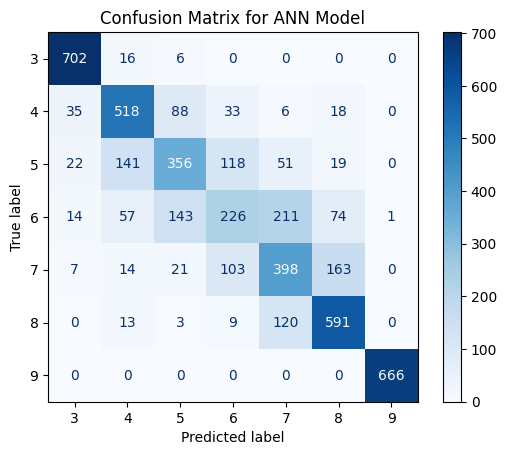

In [21]:
# classification report and confusion matrix for Best ANN model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test_num)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_ohe, axis=1)
print(classification_report(y_test_classes, y_pred_classes))
cm = confusion_matrix(y_test_classes, y_pred_classes)
unique_labels = np.unique(np.concatenate((y_test_classes, y_pred_classes)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for ANN Model')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Capstone Project/Images/confusion_matrix_ann.png')
plt.show()